In [63]:
# Explore Dataset
import os
import numpy as np
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt

In [55]:
DATA_DIR = "/home/david/Work/Epita/SCIA/imagerie_medical/wmh_segmentation_challenge/datasets/"

In [59]:
root = Path(DATA_DIR)

In [271]:
def open_nii_file(path):
    return nib.load(path)

def show_imgs(orig_img, pred_img, nb_slices, start, step):
    height, width, slices = orig_img.shape
    # We consider they have the same shapes
    plt.figure(figsize=(16, 6 * nb_slices))
    cpt = 0
    for i in range(start, min(start + nb_slices * step, slices), step):
        orig_slice = orig_img[:, :, i]
        pred_slice = pred_img[:, :, i]
        
        plt.subplot(nb_slices, 3, 3 * cpt + 1)
        plt.imshow(orig_slice, cmap="gray")
        
        plt.subplot(nb_slices, 3, 3 * cpt + 2)
        plt.imshow(pred_slice, cmap="gray")
        
        plt.subplot(nb_slices, 3, 3 * cpt + 3)
        plt.imshow(pred_slice - orig_slice, cmap="gray")
        cpt += 1
    plt.show()

In [272]:
orig = root / "Singapore" / "50" / "orig" / "FLAIR.nii.gz"
predict = root / "Singapore" / "50" / "pre" / "FLAIR.nii.gz"

In [273]:
orig_img = open_nii_file(orig)
pre_img = open_nii_file(predict)

In [274]:
orig_img.shape, pre_img.shape

((256, 232, 48), (256, 232, 48))

In [275]:
orig_data = orig_img.get_fdata()
pred_data = pre_img.get_fdata()

In [288]:
# show_imgs(orig_data, pred_data, 5, 0, 7)

In [281]:
wmh_path = root / "Singapore" / "50" / "wmh.nii.gz"
wmh = open_nii_file(wmh_path)
wmh_data = wmh.get_fdata()

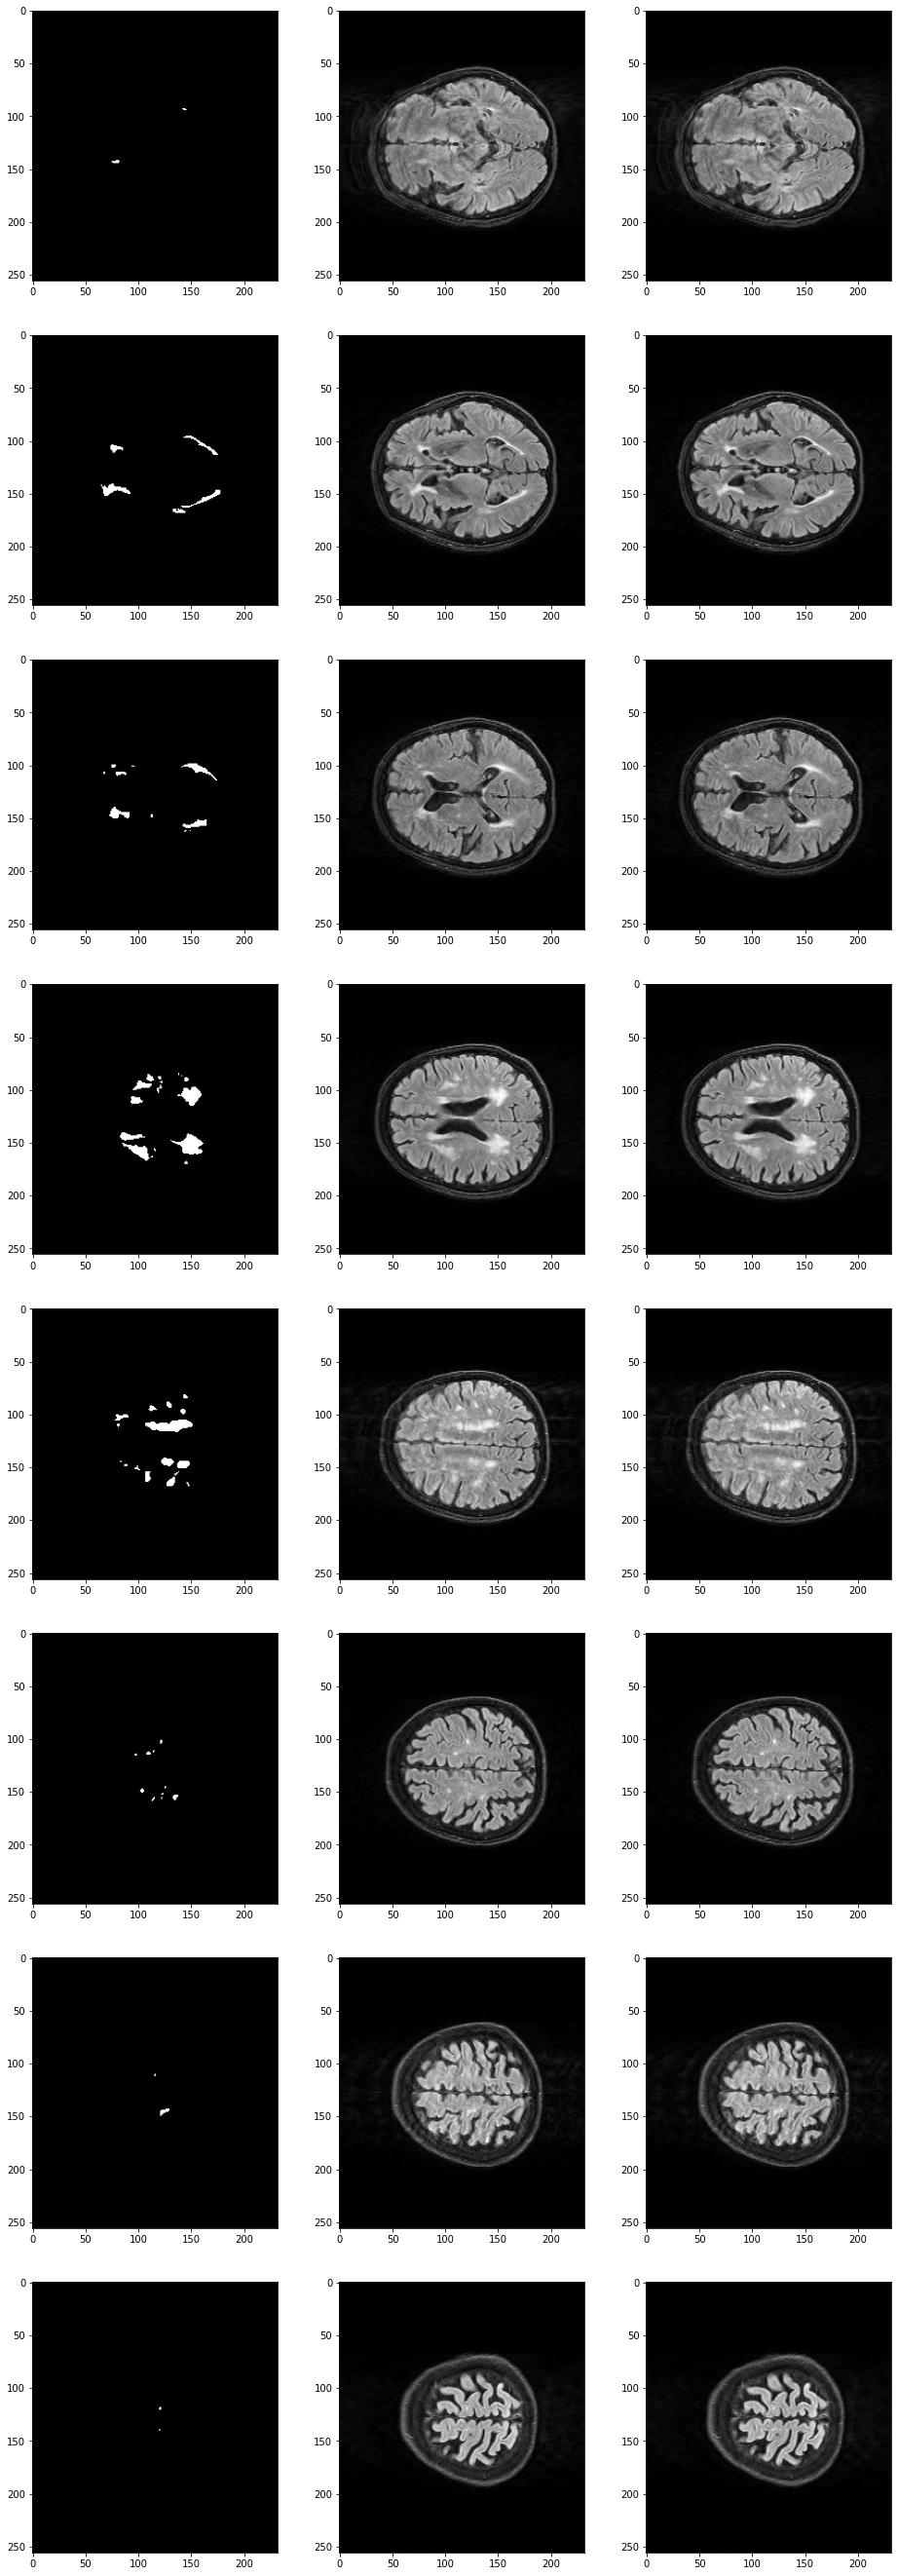

In [287]:
show_imgs(wmh_data, orig_data, 8, 20, 3)